# IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

## disabling warnings
import warnings
warnings.filterwarnings('ignore')

# DATASETS LOADING
1. The data are split in two files, load the files and merge them according to the first column, which is the index; both the files contain a "class" column, keep both the columns in the merged file calling them "class_x" and "class_y" (you can use the merge function of pandas dataframes)

In [2]:
dfx = pd.read_csv("https://pokelab.ddns.net/datasets/22_07_20-1.csv")
dfy = pd.read_csv("https://pokelab.ddns.net/datasets/22_07_20-2.csv")

display(dfx.head())
display(dfy.head())

,Unnamed: 0,A,C,E,class
0,0,-0.386248,1.536628,1.232589,1
1,1,-2.686649,4.640702,0.823433,1
2,2,0.474124,1.576616,-1.256234,0
3,3,-1.343790,-0.514008,1.520392,2
4,4,-2.187600,0.289041,1.318321,2


,Unnamed: 0,B,D,F,class
0,0,-1.432057,1.039420,0.280469,1
1,1,-4.036329,0.526320,-0.419013,1
2,2,0.179770,0.157974,-0.162869,0
3,3,-1.299109,-0.152250,0.045123,2
4,4,-2.089699,-0.494995,-0.661858,2


## MERGING THE DATASETS

In [3]:
df = dfx.merge(dfy, on="Unnamed: 0",suffixes=["_x","_y"])
display(df.head())

,Unnamed: 0,A,C,E,class_x,B,D,F,class_y
0,0,-0.386248,1.536628,1.232589,1,-1.432057,1.039420,0.280469,1
1,1,-2.686649,4.640702,0.823433,1,-4.036329,0.526320,-0.419013,1
2,2,0.474124,1.576616,-1.256234,0,0.179770,0.157974,-0.162869,0
3,3,-1.343790,-0.514008,1.520392,2,-1.299109,-0.152250,0.045123,2
4,4,-2.187600,0.289041,1.318321,2,-2.089699,-0.494995,-0.661858,2


# DATASET CLEANING
2. Delete all the rows where class_x is different from class_y, then
drop class_y and rename class_x as class

In [4]:
df.drop(df[df.class_x != df.class_y].index,inplace=True)
df.drop(columns="class_y",inplace=True)
df.rename(columns={"class_x":"class"}, inplace=True)

3. Reorder the columns in alphabetical order, but placing the class
column as the last one; the cleaned dataframe must be named
df; show its size and head

In [5]:
df.sort_index(axis=1)
display(df.head())
print("the size of the cleaned dataframe is {}".format(df.size))

,Unnamed: 0,A,C,E,class,B,D,F
0,0,-0.386248,1.536628,1.232589,1,-1.432057,1.039420,0.280469
1,1,-2.686649,4.640702,0.823433,1,-4.036329,0.526320,-0.419013
2,2,0.474124,1.576616,-1.256234,0,0.179770,0.157974,-0.162869
3,3,-1.343790,-0.514008,1.520392,2,-1.299109,-0.152250,0.045123
4,4,-2.187600,0.289041,1.318321,2,-2.089699,-0.494995,-0.661858


the size of the cleaned dataframe is 15872


## MODEL EVALUATION
4. Find the best classification scheme using three classification
methods

### prepering dataset for model evaluation

In [6]:
## DROPPING FIRST COLUMN BECAUSE IS AN INDEX
df.drop(columns="Unnamed: 0", inplace=True)
target= "class"
y=df[target]
X=df.drop(columns=target)

In [7]:
## SETTING RANDOM STATE
rs = 42

### SPLITTING DATASET

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=rs,train_size=0.5,test_size=0.5)

In [9]:
scores = ["accuracy","recall","precision_macro","f1_macro"]

modelNames = ["dt","rf","lp"]

models = {
    "dt":{"model": DecisionTreeClassifier(random_state=rs),
     "name" : "decision tree",
     "parameters":[{"max_depth":range(1,20,1),"class_weight":[None,"balanced"]}] },
    
    "rf":{"model": RandomForestClassifier(random_state=rs),
     "name" : "decision tree",
     "parameters":[{"max_depth":range(1,20,1),"n_estimators":range(10,60,10)}]},
    
    "lp":{"model": Perceptron(random_state=rs),
     "name" : "decision tree",
     "parameters":[{"early_stopping":[True,False],"class_weight":[None,"balanced"]}]},
}

results= pd.DataFrame(columns=["score","model","best_params"]+scores)
gsvs= []

5. For each classification method find the best parameter setting
with cross validation on the training set

In [10]:
for score in scores:
    for model in modelNames:
        gsv = GridSearchCV(models[model]["model"],models[model]["parameters"],scoring=score,n_jobs=16)
        gsv.fit(X_train,y_train)
        gsvs.append(gsv)
        cr= classification_report(y_test,gsv.best_estimator_.predict(X_test),zero_division=1,output_dict=True)
        print(cr)
        results.loc[len(results)]=[
            score,
            models[model]["model"],
            gsv.best_params_,
            cr['accuracy'],
            cr['macro avg']['recall'],
            cr['macro avg']['precision'],
            cr['macro avg']['f1-score'],
        ]

{'0': {'precision': 0.8065573770491803, 'recall': 0.7454545454545455, 'f1-score': 0.7748031496062993, 'support': 330.0}, '1': {'precision': 0.7876923076923077, 'recall': 0.8284789644012945, 'f1-score': 0.807570977917981, 'support': 309.0}, '2': {'precision': 0.8480662983425414, 'recall': 0.8696883852691218, 'f1-score': 0.8587412587412588, 'support': 353.0}, 'accuracy': 0.8155241935483871, 'macro avg': {'precision': 0.8141053276946765, 'recall': 0.8145406317083207, 'f1-score': 0.8137051287551796, 'support': 992.0}, 'weighted avg': {'precision': 0.815451875824667, 'recall': 0.8155241935483871, 'f1-score': 0.8148791692362896, 'support': 992.0}}
{'0': {'precision': 0.8417721518987342, 'recall': 0.806060606060606, 'f1-score': 0.8235294117647058, 'support': 330.0}, '1': {'precision': 0.8386075949367089, 'recall': 0.8576051779935275, 'f1-score': 0.8480000000000001, 'support': 309.0}, '2': {'precision': 0.8861111111111111, 'recall': 0.9036827195467422, 'f1-score': 0.8948106591865358, 'support'

/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^

{'0': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 330.0}, '1': {'precision': 0.46402877697841727, 'recall': 0.8349514563106796, 'f1-score': 0.5965317919075145, 'support': 309.0}, '2': {'precision': 0.7706422018348624, 'recall': 0.9518413597733711, 'f1-score': 0.8517110266159696, 'support': 353.0}, 'accuracy': 0.5987903225806451, 'macro avg': {'precision': 0.7448903262710932, 'recall': 0.5955976053613502, 'f1-score': 0.4827476061744947, 'support': 992.0}, 'weighted avg': {'precision': 0.7514330537641506, 'recall': 0.5987903225806451, 'f1-score': 0.48889346380530163, 'support': 992.0}}


/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^

{'0': {'precision': 0.8485915492957746, 'recall': 0.7303030303030303, 'f1-score': 0.7850162866449512, 'support': 330.0}, '1': {'precision': 0.7213541666666666, 'recall': 0.8964401294498382, 'f1-score': 0.7994227994227995, 'support': 309.0}, '2': {'precision': 0.8981481481481481, 'recall': 0.8243626062322946, 'f1-score': 0.8596750369276218, 'support': 353.0}, 'accuracy': 0.8155241935483871, 'macro avg': {'precision': 0.8226979547035298, 'recall': 0.8170352553283878, 'f1-score': 0.8147047076651242, 'support': 992.0}, 'weighted avg': {'precision': 0.8265926865563528, 'recall': 0.8155241935483871, 'f1-score': 0.8160708746471063, 'support': 992.0}}
{'0': {'precision': 0.7054545454545454, 'recall': 0.5878787878787879, 'f1-score': 0.6413223140495867, 'support': 330.0}, '1': {'precision': 0.6206896551724138, 'recall': 0.8737864077669902, 'f1-score': 0.7258064516129032, 'support': 309.0}, '2': {'precision': 0.8297872340425532, 'recall': 0.6628895184135978, 'f1-score': 0.737007874015748, 'suppor

/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/matteo/datamining/labs/env/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^

{'0': {'precision': 0.8065573770491803, 'recall': 0.7454545454545455, 'f1-score': 0.7748031496062993, 'support': 330.0}, '1': {'precision': 0.7876923076923077, 'recall': 0.8284789644012945, 'f1-score': 0.807570977917981, 'support': 309.0}, '2': {'precision': 0.8480662983425414, 'recall': 0.8696883852691218, 'f1-score': 0.8587412587412588, 'support': 353.0}, 'accuracy': 0.8155241935483871, 'macro avg': {'precision': 0.8141053276946765, 'recall': 0.8145406317083207, 'f1-score': 0.8137051287551796, 'support': 992.0}, 'weighted avg': {'precision': 0.815451875824667, 'recall': 0.8155241935483871, 'f1-score': 0.8148791692362896, 'support': 992.0}}
{'0': {'precision': 0.8651315789473685, 'recall': 0.796969696969697, 'f1-score': 0.8296529968454259, 'support': 330.0}, '1': {'precision': 0.840625, 'recall': 0.8705501618122977, 'f1-score': 0.8553259141494436, 'support': 309.0}, '2': {'precision': 0.8858695652173914, 'recall': 0.9235127478753541, 'f1-score': 0.9042995839112344, 'support': 353.0}, 

# SHOWING RESULTS

In [11]:
results.head()

,score,model,best_params,accuracy,recall,precision_macro,f1_macro
0,accuracy,DecisionTreeClassifier(random_state=42),"{'class_weight': 'balanced', 'max_depth': 8}",0.815524,0.814541,0.814105,0.813705
1,accuracy,RandomForestClassifier(random_state=42),"{'max_depth': 14, 'n_estimators': 40}",0.856855,0.855783,0.855497,0.855447
2,accuracy,Perceptron(random_state=42),"{'class_weight': None, 'early_stopping': True}",0.703629,0.708185,0.718644,0.701379
3,recall,DecisionTreeClassifier(random_state=42),"{'class_weight': None, 'max_depth': 1}",0.598790,0.595598,0.744890,0.482748
4,recall,RandomForestClassifier(random_state=42),"{'max_depth': 1, 'n_estimators': 10}",0.815524,0.817035,0.822698,0.814705


## COMPUTE METRICS
6. For each classification method compute the accuracy and the
confusion matrix on the test set

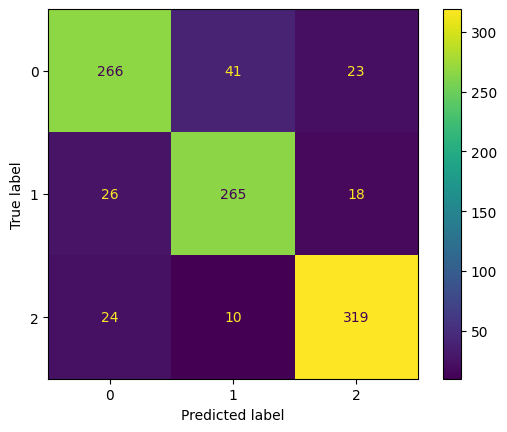

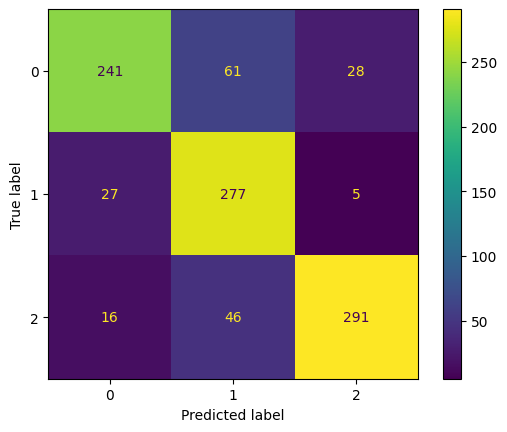

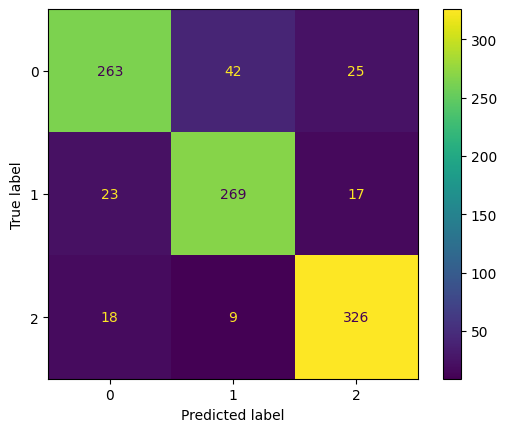

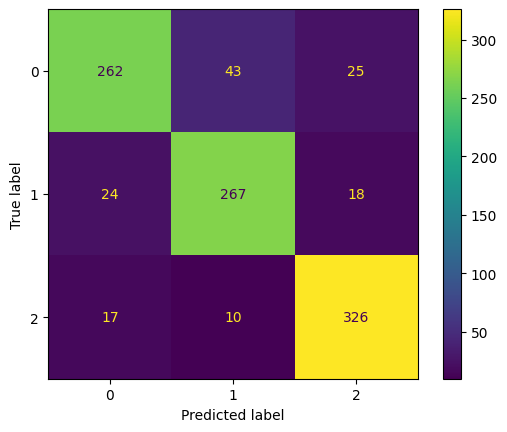

In [12]:
for score in scores:
    best_model= results.loc[results.score== score,score].idxmax()
    ConfusionMatrixDisplay.from_estimator(X=X_test,y=y_test,estimator=gsvs[best_model])


## VISUALIZE RESULTS
7. Produce a plot of the accuracies given by the methods
attempted

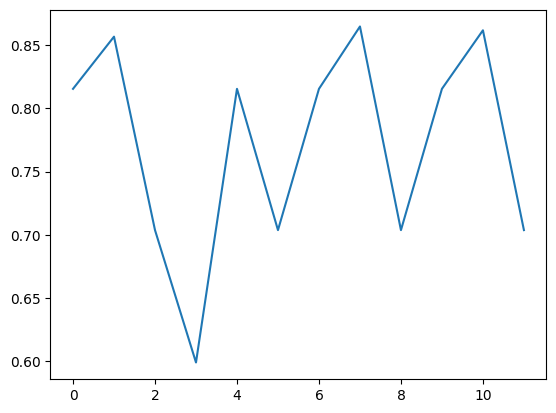

In [13]:
plt.xlabel="accuracy"
plt.ylabel="models"
plt.xticks=results.accuracy
plt.yticks=results.model
plt.plot(results.accuracy)
plt.show()